In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import tensorflow as tf
import os
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

def load_images(path):
    image = tf.io.read_file(path)
    image = tf.io.decode_jpeg(image)
    image = image[:,:,:3]
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (326,725))
    image = image/255.0
    return image


In [29]:
from os import listdir
import numpy as np
from skimage import data, io, filters
filebefore = '/content/drive/MyDrive/scal_images/'
elec_1_list = [f for f in listdir('/content/drive/MyDrive/scal_images/') ]
Y = [] 
X = []
total=len(elec_1_list)
i=1
for item in elec_1_list:
    indices = item.split('_')
    index = indices[1]
    if index=='norm':
        label = 0
    else:
        label = 1
    Y.append(label)
    sample_path = filebefore+item
    x = load_images(sample_path)
    X.append(x)
    #print("item "+str(i)+"of "+str(total)+"done"+"\n")
    i+=1

In [30]:
import numpy
X_arr = numpy.array(X)
Y_arr = numpy.array(Y)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size=0.20)

In [32]:
X_train.shape

(215, 326, 725, 3)

In [33]:
from keras.layers import *
from keras.models import Sequential
from os import listdir
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(326,725,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Feed this layer into a Flatten layer which flattens the shape from
# 3x3x64 to 576 in 1-D
model.add(Flatten())
#This is further sent into a MLP
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 324, 723, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 162, 361, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 160, 359, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 80, 179, 64)      0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 916480)            0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [53]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
#training the model
model.fit(X_train,y_train,epochs=50,validation_split=0.1,batch_size=16)

Epoch 1/50
13/13 [==============================] - 3s 253ms/step - loss: 0.2748 - accuracy: 0.9637 - val_loss: 0.1018 - val_accuracy: 0.9545
Epoch 2/50
13/13 [==============================] - 3s 251ms/step - loss: 0.0874 - accuracy: 0.9793 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 3/50
13/13 [==============================] - 3s 250ms/step - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 4/50
13/13 [==============================] - 3s 252ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 3s 251ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 3s 251ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 7.9094e-04 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 3s 251ms/step - loss: 9.1822e-04 - accuracy: 1.0000 - val_loss: 6.1402e-04 - val_accuracy: 1

In [62]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 152ms/step - loss: 0.3302 - accuracy: 0.9444


[0.33018800616264343, 0.9444444179534912]

In [63]:
y_pred = model.predict(X_test)

In [64]:
y = []
for i in range(len(y_pred)):
  if y_pred[i][0]>=0.5:
    y.append(0)
  else:
    y.append(1)

## Evaluation Metrics

#### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y)
cf_matrix

array([[25,  2],
       [ 1, 26]])

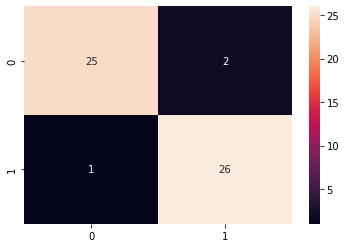

In [66]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

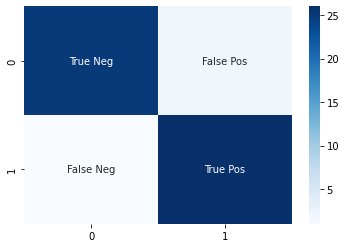

In [68]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [69]:
from re import T
TP = cf_matrix[1][1]
TN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]

Accuracy = (TP + TN) / All Predictions

Sensitivity (Recall) = TP / (FN + TP)

Specificity = TN / (TN + FP)

Precision/Positive Predictive Value = TP / (TP + FP)

F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)

Negative Predictive Value = TN/(TN+FN)



In [70]:
accuracy = ((TP+TN)/y_test.shape)*100
print("accuracy: ", accuracy)

accuracy:  [94.44444444]


In [71]:
sensitivity = TP/(FN+TP)
print("sensitivity: ", sensitivity)

sensitivity:  0.9629629629629629


In [72]:
specificity = TN / (TN+FP)
print("specificity: ", specificity)

specificity:  0.9259259259259259


In [73]:
#Precision/Positive Predictive Value 
PPV = TP / (TP + FP)
print("Precision/Positive Predictive Value: ", PPV)

Precision/Positive Predictive Value:  0.9285714285714286


In [75]:
#F1 Score 
f1 = 2 * (PPV * sensitivity) / (PPV + sensitivity)
print("F1 Score: ", f1)

F1 Score:  0.9454545454545454


In [76]:
#Negative Predictive Value 
NPV = TN/(TN+FN)
print("Negative Predictive Value: ", NPV)

#output: nan as TN=0 and FN=0

Negative Predictive Value:  0.9615384615384616


In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y)

0.9444444444444444

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.93      0.96      0.95        27

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



In [79]:
model.save('/content/drive/MyDrive/Major_Project/final')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Major_Project/final/assets
